# 3C-based methods
## aims
In this tutorial you will :



1.   Read tutorials on 3C based methods
2.   Answer questionnaire
3. Run module to 
  - visualize Hi-C matrices from Bacillus subtilis
  - find out what the mutants are doing
4. Run the advanced module to visualize contacts on a circular plot
5. Further reading



## 0 - Preliminary reading


Make sure you are confortable with the following concepts, otherwise follow the link.
- Bacterial chromosome organisation
- ...




## 1 - 3C based methods


- [Wikipedia](https://en.wikipedia.org/wiki/Chromosome_conformation_capture)
- [Chromosome Conformation Capture and Beyond: Toward an Integrative View of  Chromosome Structure and Function](https://doi.org/10.1016/j.molcel.2019.12.021)



## 2 - questionnaire


- What is chromosome conformation capture useful for?
- What is Hi-C?
- What are main steps in order to generate and plot a Hi-C contact matrix?
- What is a Topological Associated Domain (TAD)? How does it show up in a Hi-C matrix?
- What is a loop? How does it show up in a Hi-C matrix?

## 3- Construct




In this construct you will load Hi-C matrices from the bacterium bacillus subtilis.
You will visualize the matrices, interpret some features, and compare those features with matrices from mutant strains.

Matrices from here:
/mnt/PALM_dataserv/DATA/Antoine/GPU_Computer_temporary_backup/Antoine/HiC_CircularPlot/Data/Raw_contact_maps_2kb_bins

### Mount Drive to access Hi-C matrices
To load an image in Google Colab from your google drive :
-  Mount your google drive (drive folder icon in the left menu of Google colab). This needs to be done only once as the notebook will remember this step.
-  Navigate to the file to be loaded. Right click on it and "copy path"
-  Use this path to load the file within google Colab.

Alternatively you run the cell block below.

### Import Libraries

In [2]:
import numpy as np
from matplotlib import colors, cm
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import os
import pandas as pd

print("OK")

OK


### Load Hi-C matrices

In [5]:
# Load reference matrice
filename = 'data/WT_HM1320.dat'
mat1 = np.loadtxt(filename) 
mat1_name = os.path.splitext(os.path.basename(filename))[0]
print(str(mat1_name) + ' matrix shape :'  + str(mat1.shape))

# Load second matrice for comparison
# filename = '/content/drive/MyDrive/data/DeltaParS.dat'
filename = 'data/DeltaSMC.dat'
mat2_name = os.path.splitext(os.path.basename(filename))[0]
mat2 = np.loadtxt(filename) 
print(str(mat2_name) + ' matrix original shape :'  + str(mat2.shape))
mat2 = resize(mat2, (mat_WT.shape[0],mat1.shape[1]), order=1, preserve_range=True)
mat2_name = os.path.splitext(os.path.basename(filename))[0]
print(str(mat2_name) + ' matrix new shape :'  + str(mat2.shape))



WT_HM1320 matrix shape :(1054, 1054)
DeltaSMC matrix original shape :(2108, 2108)


NameError: name 'resize' is not defined

### Normalize Hi-C matrices

In [ ]:
# Normalize mat1 matrix
mat1 = mat1 / np.nanmedian(mat1, axis=1)
mat1 = mat1 / np.nanmedian(mat1, axis=0)

# Normalize mat_dSMC matrix
mat2 = mat2 / np.nanmedian(mat2, axis=1)
mat2 = mat2 / np.nanmedian(mat2, axis=0)

# print(pd.DataFrame(mat1.flatten()).describe())
# print(pd.DataFrame(mat2.flatten()).describe())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# # Shift the matrix to get the Origin or the Terminus at the center (default is Origin at the center)
# mat1 = np.roll(mat1, round(mat1.shape[0]/2), axis=1)
# mat1 = np.roll(mat1, round(mat1.shape[0]/2), axis=0)

# mat2 = np.roll(mat2, round(mat2.shape[0]/2), axis=1)
# mat2 = np.roll(mat2, round(mat2.shape[0]/2), axis=0)

### Display Hi-C matrices

Text(0.5, 1.05, 'DeltaSMC')

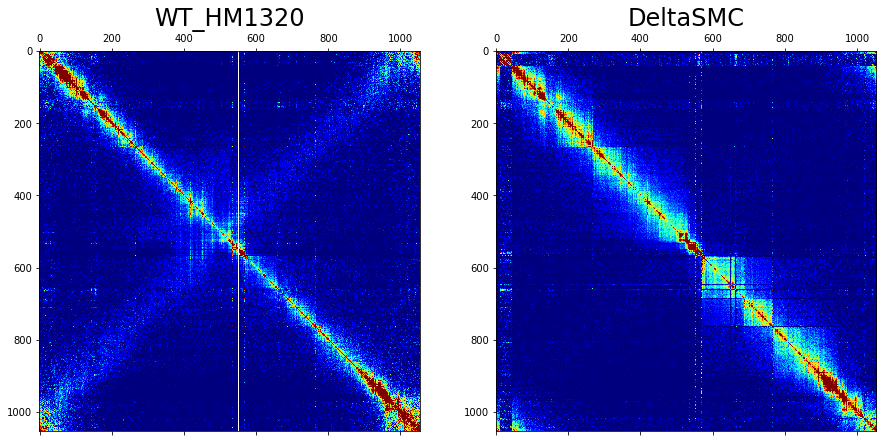

In [ ]:
# Normalize colormap to custom range
cmap = cm.get_cmap('jet')
norm_mat1 = colors.Normalize(1, np.nanmean(mat1)*5)
norm_mat2 = colors.Normalize(1, np.nanmean(mat2)*5)

# Plot matrices
fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot(1,2,1)
ax1.matshow(mat1, cmap=cmap, norm=norm_mat1)
ax1.set_title(mat1_name, fontsize=24)

ax2 = plt.subplot(1,2,2)
ax2.matshow(mat2, cmap=cmap, norm=norm_mat2)
ax2.set_title(mat2_name, fontsize=24)

### Questions:
In the Wildtype matrix:
- what does the main diagonal (from top left to bottom right) represent?
- What does the secondary diagonal (from top right to bottom left) represent? 

Make a circular scheme representing the bacterial chromosome and draw those contacts.

In the mutant matrix:
- what do you see?
- What is the effect of the mutant?

### Exercice

Zoom into matrices features of interest to get a side by side comparison with more details.

### Display Hi-C matrices ratio

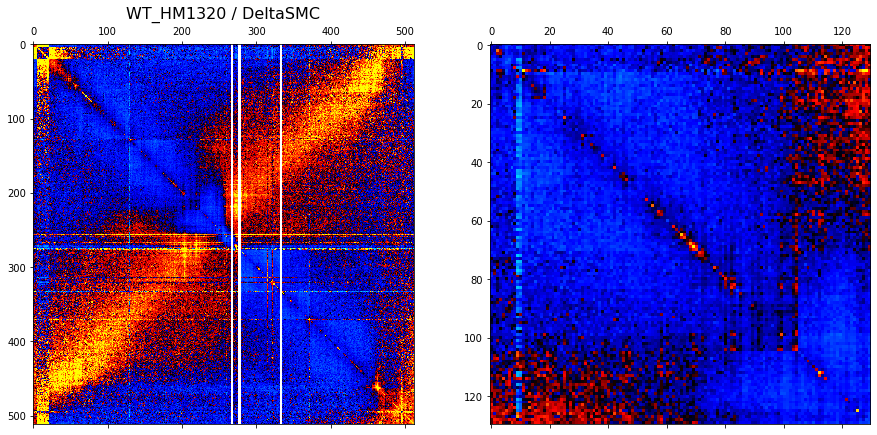

In [ ]:
# Resize matrices to get a more global features overview
N = 512
mat1_resized = resize(mat1, (N,N), order=1, preserve_range=True)
mat2_resized = resize(mat2, (N,N), order=1, preserve_range=True)
mat_ratio = mat1_resized/mat2_resized


# Build custom colormap adapted to hilight gains and losts
colors_list = ["aqua","blue","darkblue", "black", "black", "darkred","red","yellow"]
nodes = [0.0, 0.35, 0.45, 0.4999, 0.5001, 0.55, 0.65, 1.0]
cmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors_list)))
norm = colors.Normalize(0, 2)

# Plot matrices ratio
fig, axs = plt.subplots(1, 2, figsize=(15,15))
im = axs[0].matshow(mat_ratio, cmap=cmap, norm=norm)
axs[0].set_title(mat1_name + ' / ' +  mat2_name, fontsize=16)
im = axs[1].matshow(mat_ratio[120:250,120:250], cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax, extend='both')



### Questions
- What is the matrices ratio hilighting?
- What seems to be lost in the zoom area?

## 4 - Run the advanced module to visualize matrices as circular plots

### Display matrices as circular plots

Bacillus subtilis's chromosome is circular so it makes sense to visualize matrices contacts on a circular plot. 'mne' Python package provides tools to display such plots (called connectivity plots).

ressources:
https://mne.tools/stable/index.html

In [ ]:
# !pip install mne

In [ ]:
from mne.viz import plot_connectivity_circle


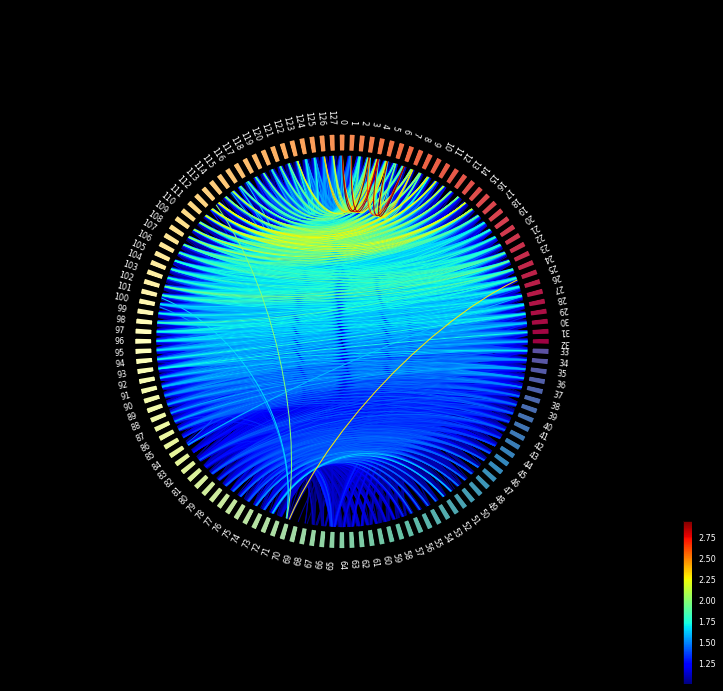

(<Figure size 1080x1080 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x7fb67d6cc4d0>)

In [ ]:
# Resize matrices to get a reasonnable amount of nodes to display
N = 128 # Number of nodes
mat1_resized = resize(mat1, (N,N), order=1, preserve_range=True)
mat2_resized = resize(mat2, (N,N), order=1, preserve_range=True)
mat_ratio = mat1_resized/mat2_resized
mat_ratio[mat_ratio > 3] = np.nan # threshold matrix to get rid of extreme values


# Shift the matrix to get the Origin at the top
mat_ratio = np.roll(mat_ratio, -round(mat_ratio.shape[0]/4), axis=1)
mat_ratio = np.roll(mat_ratio, -round(mat_ratio.shape[0]/4), axis=0)
mat_ratio = np.fliplr(mat_ratio)
mat_ratio = np.flipud(mat_ratio)
mat_ratio = np.where(mat_ratio > 1.0, mat_ratio, np.nan)  # NaN so it doesn't display the weak links

# Add coordinates for each node
node_names = [i for i in range(N)]  # List of labels [N], #node_names = N * ['']
node_names = np.roll(node_names, -round(len(node_names)/4)-1, axis=0)
node_names = np.flip(node_names)

# Display circular plot
fig = plt.figure(num=None, figsize=(15, 15), facecolor='black')
plot_connectivity_circle(mat_ratio, node_names, colormap = 'jet', fig=fig, node_linewidth=5, linewidth=1) 


## 5 - Further reading